In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
plt.style.use('fivethirtyeight')

jupyter nbextension enable --py widgetsnbextension

In [2]:
df = pd.read_excel('df_ENA_Sudeste.xlsx', index_col=[0], parse_dates=[0])
df.tail()

,Month,Day,Year,ENA_obs,ENA_chuva,ENA_chuva_2,ENA_chuva_3,Season,EA
Date,,,,,,,,,
2019-02-10,2,10,2019,40782,0.146148,1.461480,14.614802,1,53637.093750
2019-02-11,2,11,2019,41336,4.477100,44.770995,447.709955,1,53375.347656
2019-02-12,2,12,2019,42111,10.478274,104.782740,1047.827396,1,53306.972656
2019-02-13,2,13,2019,42424,0.814051,8.140514,81.405139,1,53323.078125
2019-02-14,2,14,2019,42405,0.114348,1.143479,11.434789,1,53433.339844


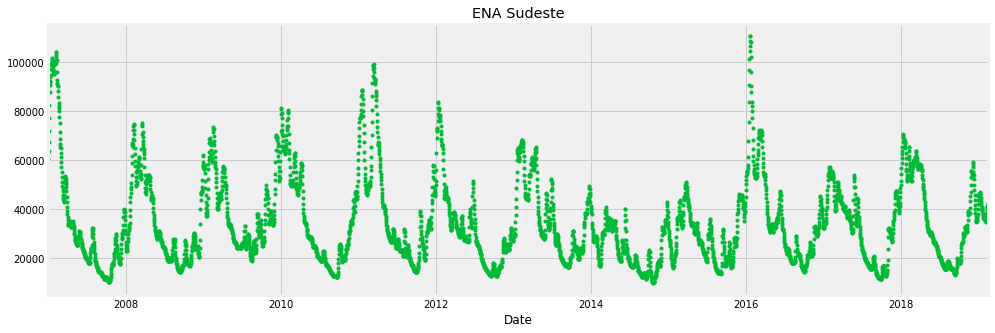

In [3]:
df_ = df['ENA_obs']
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df_.plot(style='.', figsize=(15,5), color=color_pal[3], title='ENA Sudeste')
df = df[['ENA_obs', 'ENA_chuva', 'Season', 'Month', 'Year']]

In [4]:
train_dataset = df.sample(frac=0.9,random_state=0)
test_dataset = df.drop(train_dataset.index)
print(len(train_dataset), 'train examples')
print(len(test_dataset), 'test examples')

3985 train examples
443 test examples


In [5]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ENA_obs,3985.0,34622.258720,17817.523717,10013.0,20917.000000,30307.000000,44459.000000,110765.000000
ENA_chuva,3985.0,4.040901,6.246868,0.0,0.111007,1.127303,5.478383,59.973304
Season,3985.0,2.491593,1.115108,1.0,1.000000,2.000000,3.000000,4.000000
Month,3985.0,6.476788,3.473512,1.0,3.000000,7.000000,9.000000,12.000000
Year,3985.0,2012.553827,3.500169,2007.0,2010.000000,2013.000000,2016.000000,2019.000000


In [6]:
train_labels = train_dataset.pop('ENA_obs')
test_labels = test_dataset.pop('ENA_obs')

In [7]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
normed_train_data = scaler.fit_transform(train_dataset)
normed_test_data = scaler.fit_transform(test_dataset)

In [8]:
train_pool = Pool(normed_train_data, 
                  train_labels)
test_pool = Pool(normed_test_data, 
                  test_labels) 

In [9]:
model = CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=normed_train_data, 
                                       y=train_labels, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 6715.957185
bestIteration = 999

0:	loss: 6715.9571846	best: 6715.9571846 (0)	total: 3.47s	remaining: 1m 40s

bestTest = 6314.633434
bestIteration = 992

1:	loss: 6314.6334341	best: 6314.6334341 (1)	total: 5.66s	remaining: 1m 19s

bestTest = 6797.947598
bestIteration = 998

2:	loss: 6797.9475976	best: 6314.6334341 (1)	total: 7.42s	remaining: 1m 6s

bestTest = 6395.706715
bestIteration = 999

3:	loss: 6395.7067154	best: 6314.6334341 (1)	total: 9.71s	remaining: 1m 3s

bestTest = 6845.001827
bestIteration = 999

4:	loss: 6845.0018274	best: 6314.6334341 (1)	total: 12s	remaining: 1m

bestTest = 6349.098556
bestIteration = 955

5:	loss: 6349.0985556	best: 6314.6334341 (1)	total: 14.6s	remaining: 58.3s

bestTest = 6902.586711
bestIteration = 999

6:	loss: 6902.5867113	best: 6314.6334341 (1)	total: 17.4s	remaining: 57.1s

bestTest = 6379.050643
bestIteration = 994

7:	loss: 6379.0506432	best: 6314.6334341 (1)	total: 19.7s	remaining: 54.1s

bestTest = 6966.225063
bestIteration = 999

In [11]:
#print_cv_summary(cv_data)

NameError: name 'print_cv_summary' is not defined

In [10]:
preds = model.predict(normed_test_data).flatten()
rmse = np.sqrt(mean_squared_error(test_labels, preds))
mae = mean_absolute_error(test_labels, preds)
r2 = r2_score(test_labels, preds)

print("MAE: %f" % (mae))
print("RMSE: %f" % (rmse))
print("R2: %f" % (r2))

MAE: 4141.349399
RMSE: 6090.978235
R2: 0.872673


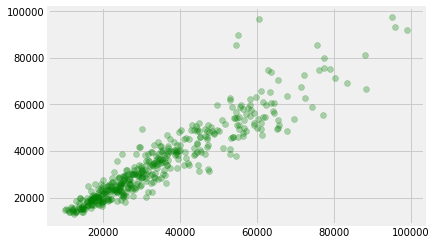

In [11]:
import matplotlib.pyplot as plt
plt.scatter(test_labels, preds, alpha = 0.3, c = 'g')

for x, y in zip(y_test, preds):
    print("%4.5f - %4.5f" % (x,y))

**Análise resultados**

https://catboost.ai/docs/concepts/python-reference_catboostregressor_calc_feature_statistics.html

In [12]:
res = model.calc_feature_statistics(normed_train_data,
                                    train_labels,
                                    feature=2,
                                    plot=True)

**Novo Dataset**

In [13]:
new_inputs = pd.read_excel('GFS-por_região-16_dias_24062020.xlsx')
new_input = new_inputs[['ENA_obs', 'ENA_chuva', 'Season', 'Month', 'Year']]
new_input.tail()

,ENA_obs,ENA_chuva,Season,Month,Year
11,0,34.219674,2,6,2020
12,0,2.838392,2,6,2020
13,0,1.259169,2,6,2020
14,0,4.196801,2,6,2020
15,0,6.071800,2,6,2020


In [14]:
X_new_input = new_input.drop('ENA_obs', axis =1)

In [15]:
X_new = scaler.fit_transform(X_new_input)
y_new= new_input['ENA_obs']

In [16]:
new_y= model.predict(X_new).flatten()

In [17]:
print(*new_y, sep = "\n") 

29200.01757623975
28165.179014152913
28192.44860676542
28419.788929672963
28895.86178723045
28489.321158031544
28675.371362742644
28675.371362742644
28496.325856518983
27981.573984994648
28810.458211436315
27795.965239663383
28608.269356550805
29536.399622959514
27978.803257319552
28608.68013164977
